In [57]:
import folium
from folium.plugins import MarkerCluster
import alphashape


# 필요한 라이브러리 다시 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import geopandas as gpd
from shapely.geometry import MultiPoint, LineString
from shapely.ops import unary_union, polygonize

In [58]:
# 데이터 불러오기
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# 불필요한 컬럼 제거
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')  # 존재하지 않는 컬럼이 있어도 오류 방지
df = df.dropna(axis=0)

# BuildingArea 0값 제거
df = df[df['BuildingArea'] > 0.1]

# 원핫 인코딩
train_data = pd.get_dummies(df, dtype='float')

# 타겟 변수와 특성 분리
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

# 위도, 경도의 유니크한 조합 가져오기
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values


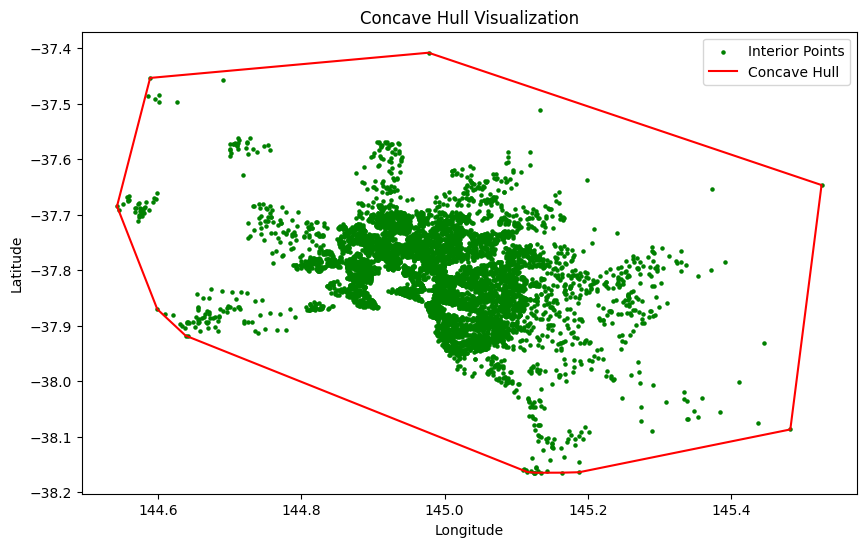

In [14]:
# Concave Hull 생성
points = MultiPoint(lat_lon_unique)

# Convex Hull의 외곽선을 LineString으로 변환
convex_hull_line = LineString(points.convex_hull.exterior.coords)

# Convex Hull을 기반으로 Concave Hull 생성
#concave_hull = unary_union(polygonize([convex_hull_line]))
concave_hull = unary_union(polygonize([convex_hull_line]))

# 시각화
plt.figure(figsize=(10, 6))

# 내부 데이터(초록색)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Concave Hull 외곽선(빨간색)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]
    
    # 좌표를 분리하여 플롯
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.plot(hull_lons, hull_lats, 'r-', linewidth=1.5, label="Concave Hull")

# 그래프 설정
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concave Hull Visualization")
plt.legend()
plt.show()


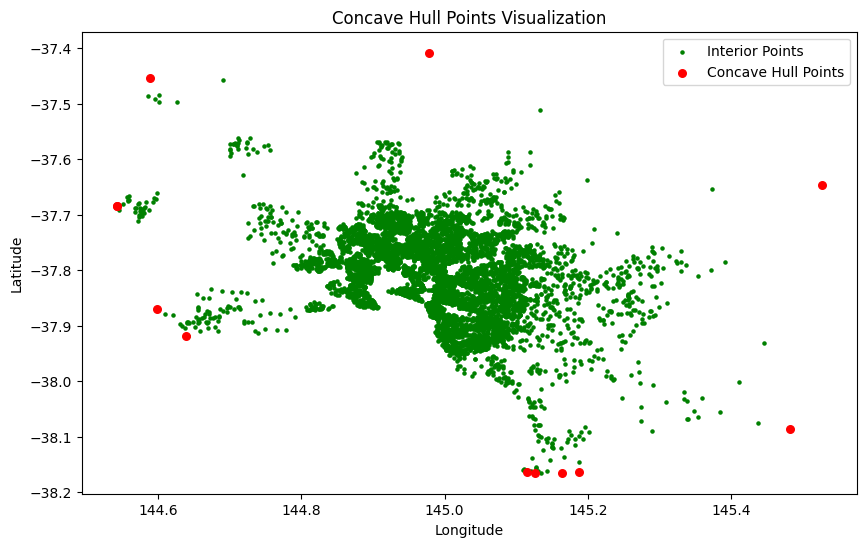

In [2]:
# 필요한 라이브러리 다시 로드
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPoint, LineString
from shapely.ops import unary_union, polygonize

# 데이터 불러오기
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# 불필요한 컬럼 제거
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')
df = df.dropna(axis=0)

# BuildingArea 0값 제거
df = df[df['BuildingArea'] > 0.1]

# 원핫 인코딩
train_data = pd.get_dummies(df, dtype='float')

# 타겟 변수와 특성 분리
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

# 위도, 경도의 유니크한 조합 가져오기
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values

# Concave Hull 생성
points = MultiPoint(lat_lon_unique)

# Convex Hull의 외곽선을 LineString으로 변환
convex_hull_line = LineString(points.convex_hull.exterior.coords)

# Convex Hull을 기반으로 Concave Hull 생성
concave_hull = unary_union(list(polygonize([convex_hull_line])))

# 시각화 (Concave Hull을 점으로 표시)
plt.figure(figsize=(10, 6))

# 내부 데이터(초록색)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Concave Hull 외곽선 점(빨간색)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]
    
    # Concave Hull 외곽 점 플롯
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.scatter(hull_lons, hull_lats, c='red', s=30, label="Concave Hull Points")

# 그래프 설정
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concave Hull Points Visualization")
plt.legend()
plt.show()


In [65]:
df_concave_hull = pd.read_csv("/data/ephemeral/home/Jeongseon/optimized_solutions_with_concave_hull.csv")
df_concave_hull.head()


,index,Lattitude_optimized,Longtitude_optimized,Predicted_Price
0,0,145.239258,-37.942285,811578.52
1,1,145.282792,-37.953913,811578.52
2,3,145.295229,-37.900771,501390.00
3,6,145.189704,-38.139274,501390.00
4,11,145.396720,-37.897069,811578.52


hi


KeyError: 'Longtitude_optimized'

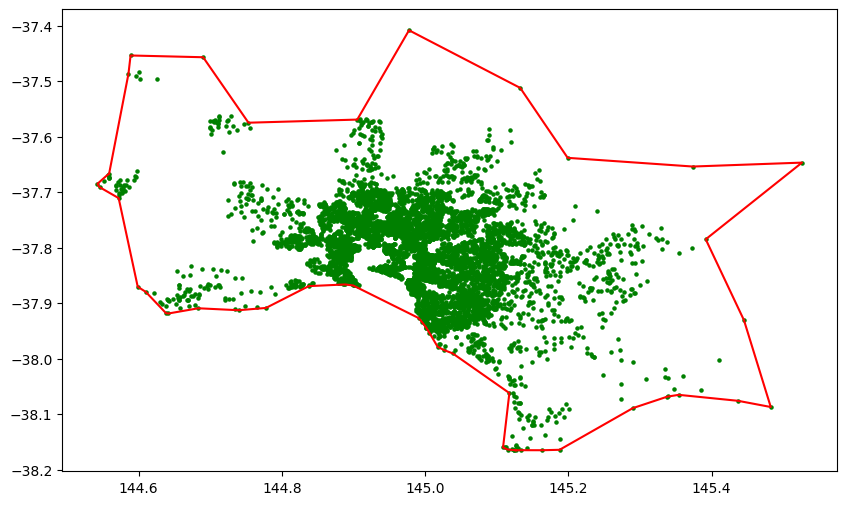

In [67]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alphashape
import geopandas as gpd
from shapely.geometry import MultiPoint, Polygon

# 데이터 다시 로드
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# 불필요한 컬럼 제거
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')
df = df.dropna(axis=0)

# BuildingArea 0값 제거
df = df[df['BuildingArea'] > 0.1]

# 원핫 인코딩
train_data = pd.get_dummies(df, dtype='float')

# 타겟 변수와 특성 분리
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

concave_long = df_concave_hull['Longtitude_optimized']
concave_lat = df_concave_hull['Lattitude_optimized']

# 위도, 경도의 유니크한 조합 가져오기
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values

# 🔹 Alpha Shape을 사용하여 Concave Hull 생성 (더 세밀한 외곽선)
alpha_value = 9  # 값이 작을수록 더 세밀한 다각형이 됨
concave_hull = alphashape.alphashape(lat_lon_unique, alpha_value) #이건 그냥 그림임

#시각화
plt.figure(figsize=(10, 6))

# 내부 데이터(초록색)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Alpha Shape 외곽선(파란색)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]

    # 좌표를 분리하여 플롯
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.plot(hull_lons, hull_lats, '-r', label="Alpha Shape (Concave Hull)")
    #plt.scatter(hull_lons, hull_lats, c='red', s=30, label="Alpha Shape (Concave Hull)")

##결과 찍기
plt.scatter(concave_long['Longtitude_optimized'], concave_lat['Lattitude_optimized'], c='yellow', s=5, label="Interior Points")

# 그래프 설정
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Refined Concave Hull with Alpha Shape")
plt.legend()
plt.show()


In [56]:
concave_hull_coords

[(-38.16492, 145.12656),
 (-38.16475, 145.1345),
 (-38.16483, 145.16383000000005),
 (-38.16404, 145.18781),
 (-38.08902, 145.29006),
 (-38.0683, 145.33833),
 (-38.06508, 145.35416999999995),
 (-38.07583, 145.43698),
 (-38.08699, 145.48273),
 (-37.93064, 145.4453),
 (-37.78495, 145.3919),
 (-37.64685, 145.52635),
 (-37.65391, 145.37389),
 (-37.63826, 145.1991),
 (-37.51232, 145.13282),
 (-37.40853, 144.97749),
 (-37.56937, 144.90524),
 (-37.57499, 144.75329),
 (-37.45709, 144.68999),
 (-37.45392, 144.58864),
 (-37.48701, 144.58567),
 (-37.66745, 144.55857),
 (-37.66869000000001, 144.55666000000005),
 (-37.68503, 144.54237),
 (-37.69104, 144.54532),
 (-37.71077, 144.57198),
 (-37.87047000000001, 144.59864),
 (-37.87959, 144.60977),
 (-37.91807, 144.63816),
 (-37.91859, 144.64143),
 (-37.90918, 144.68325),
 (-37.91269000000001, 144.73946),
 (-37.90858, 144.77771),
 (-37.8693, 144.8375),
 (-37.8663, 144.8883),
 (-37.8681, 144.8994),
 (-37.9268, 144.991),
 (-37.93464, 144.99601),
 (-37.944,

In [29]:
concave_hull_coords[0][0]

-38.16492

In [30]:
import folium

# 지도 중심 좌표 설정 (데이터의 평균 위치 사용)
center_lat = X_train["Lattitude"].mean()
center_lon = X_train["Longtitude"].mean()

# Folium 지도 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)


# 내부 데이터 점 추가 (초록색 점)
for i in range(len(X_train)):
    folium.CircleMarker(
        location=[X_train.iloc[i]["Lattitude"], X_train.iloc[i]["Longtitude"]],
        radius=2,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(m)

# Alpha Shape 외곽선 좌표 추가 (빨간색 점)
for i in range(len(concave_hull_coords)):
    folium.CircleMarker(
        location=[concave_hull_coords[i][0], concave_hull_coords[i][1]],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup=f"Convex Hull Point {i}"
    ).add_to(m)


# 지도 저장
map_path = "/data/ephemeral/home/Jeongseon/melb_alpha_shape_map_7.html"
m.save(map_path)

# 생성된 지도 파일 경로 출력
map_path


'/data/ephemeral/home/Jeongseon/melb_alpha_shape_map_7.html'